In [4]:
%run "! DEFAULT PLOT THINGIES.ipynb"
%run "../! DEFAULT PLOT THINGIES.ipynb"

<IPython.core.display.Javascript object>

Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\biax-heatmap-A-beta
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


<IPython.core.display.Javascript object>

Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\biax-heatmap-A-beta
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
def loaddata(path):
    fitdata = np.load(path + "power_fit.npy")
    print fitdata.shape  # 

    vardtdata = {i: np.loadtxt(path + "dt%05i.txt" % i)[1:] for i in range(1,21)}
    minlength = fitdata.shape[0] #min(len(x) for x in vardtdata.values())

    dts = np.arange(0,21)
    ts = np.arange(0,minlength)

    vardtdata = np.concatenate([[np.array([0]*minlength)]] + [[x[:minlength]] for x in vardtdata.values()])
    print vardtdata.shape, dts.shape, ts.shape
    return ts,dts,fitdata, vardtdata

301


[]

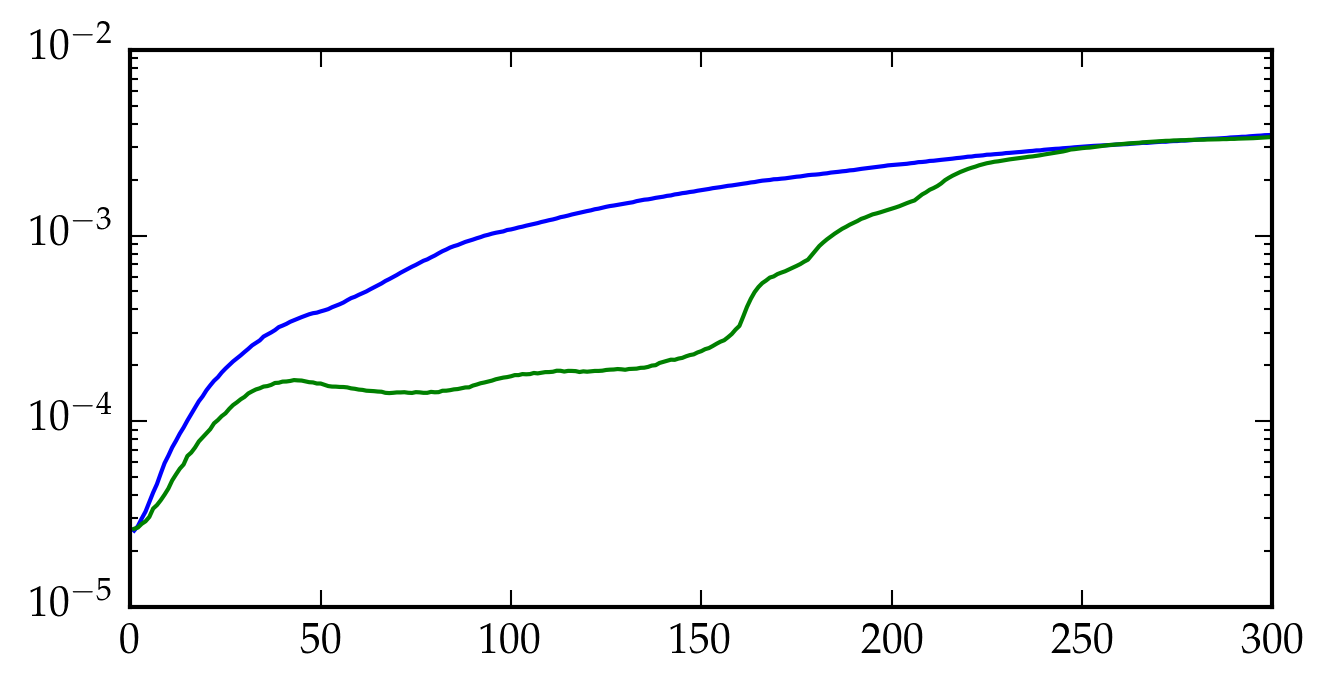

In [3]:
# we moeten van twee series een grote dt var-meting doen:
# U:\20150907 3e-5\vardt\20150907T204511~gdot3.00000E-5~A520000000000.00000 en 
# U:\20150907 3e-5\vardt\20150907T160911~gdot3.00000E-5~A520000000000.00000

bothdiffs = []

for path in [r"U:\20150907 3e-5\crop\20150907T204511~gdot3.00000E-5~A520000000000.00000\%05i.npy",
             r"U:\20150907 3e-5\crop\20150907T160911~gdot3.00000E-5~A520000000000.00000\%05i.npy"]:
    diffs = []
    start = np.load(path % 1200)

    for i in range(1200,1501):
        cur = np.load(path % i)
        diffs.append( np.mean( (start - cur)**2) )

    plt.plot(diffs)
    
    bothdiffs.append(diffs)
    
lowphilongvar = bothdiffs[0]
highphilongvar = bothdiffs[1]

print len(lowphilongvar)

plt.semilogy()

In [5]:
[x for x in all_biax_measurements if '20150907T204511' in x['path'] or '20150907T160911' in x['path']]

[{u'frame_rate': 1.000000037506565,
  u'length': 13336,
  u'path': u'u:/20150907 3e-5\\20150907T160911~gdot3.00000E-5~A520000000000.00000',
  u'phi': 1.4999807999785428,
  u'shear_rate': 3e-05},
 {u'frame_rate': 1.000000037506565,
  u'length': 13336,
  u'path': u'u:/20150907 3e-5\\20150907T204511~gdot3.00000E-5~A520000000000.00000',
  u'phi': 0.8999915673782983,
  u'shear_rate': 3e-05}]

In [6]:
#data_lowphi = loaddata(r"U:\20150907 3e-5\vardt\20150907T114511~gdot3.00000E-5~A520000000000.00000" + "\\")
data_lowphi = loaddata(r"U:\20150907 3e-5\vardt\20150907T204511~gdot3.00000E-5~A520000000000.00000" + "\\")
data_highphi = loaddata(r"U:\20150907 3e-5\vardt\20150907T160911~gdot3.00000E-5~A520000000000.00000" + "\\")

lts,ldts,lfitdata,lvardtdata = data_lowphi
ts,dts,fitdata, vardtdata = data_highphi


(13313, 4)
(21, 13313) (21,) (13313,)
(13313, 4)
(21, 13313) (21,) (13313,)


1.33651388493e-06 4.75476101513e-07
\includegraphics{notebooks/biax-heatmap-A-beta/variance-heatmap-plus-fit.pdf}


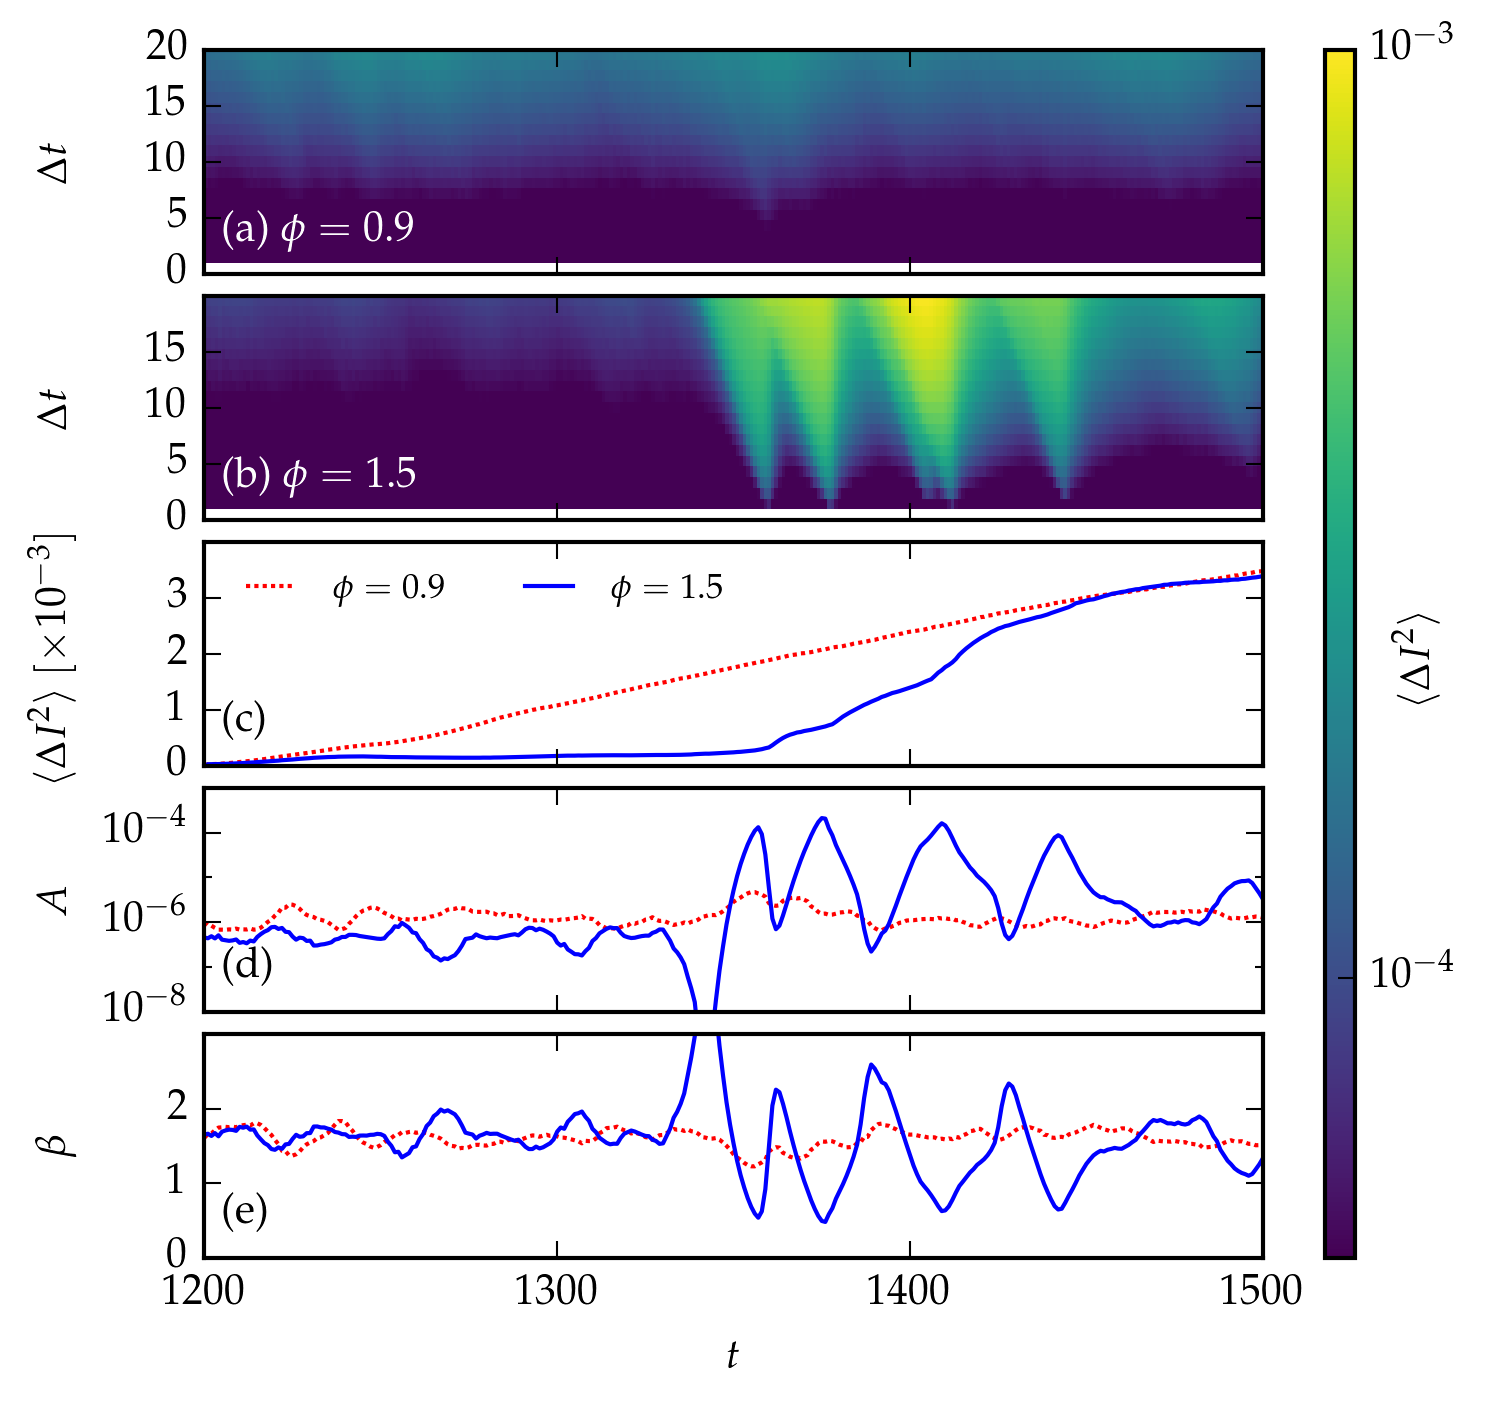

In [7]:
import matplotlib.gridspec as gridspec
from scipy.optimize import curve_fit

fullfig(hf=2)
gs = gridspec.GridSpec(5, 1, bottom=0.1, wspace=0, hspace=0.1)
#gs.update(wspace=0, hspace=0.1)

ax0 = plt.subplot(gs[0,0])
ax1 = plt.subplot(gs[1,0], sharex=ax0)
ax_var = plt.subplot(gs[2,0], sharex=ax0)
ax2 = plt.subplot(gs[3,0], sharex=ax0)
ax3 = plt.subplot(gs[4,0], sharex=ax0)


for ax in [ax0,ax1,ax2,ax3,ax_var]:
    ax.yaxis.set_label_coords(-0.12, 0.5)

plt.setp(ax0.get_xticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax_var.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
ax3.set_xlabel("$t$")

msk = np.arange(1200,1501)
ax3.set_xticks([1200,1300,1400,1500])

norm = matplotlib.colors.LogNorm(vmin=5e-5, vmax=1e-3) 

#norm = matplotlib.colors.Normalize(vmin=0, vmax=3e-4)
ax0.imshow(lvardtdata[:,msk]/npix, aspect='auto', origin='lower', extent=[min(msk), max(msk), 0, max(dts)], norm=norm, interpolation='nearest')
ax0.set_ylabel('$\Delta t$')
subplotlabel(r"(a) $\phi = 0.9$", ax=ax0, zorder=1, loc='lower left', color='white', size='medium')
ax0.set_yticks([0,5,10,15,20])

im = ax1.imshow(vardtdata[:,msk]/npix, aspect='auto', origin='lower', extent=[min(msk), max(msk), 0, max(dts)], norm=norm, interpolation='nearest')
ax1.set_ylabel('$\Delta t$')
subplotlabel(r"(b) $\phi = 1.5$", ax=ax1, zorder=1, loc='lower left', color='white', size='medium')
ax1.set_yticks([0,5,10,15])

ax_var.plot(lts[msk], lowphilongvar, color='red', dashes=(1,1), label=r'$\phi = 0.9$')
ax_var.plot(lts[msk], highphilongvar, label=r'$\phi = 1.5$')
ax_var.set_ylim(0, 0.004)
ax_var.set_yticks([0,0.001,0.002,0.003,0.004])
ax_var.set_yticklabels([0,1,2,3,""])
ax_var.set_ylabel(r"$\langle \Delta I^2 \rangle~[\times 10^{-3}]$")
ax_var.legend(loc='upper left', frameon=False, fontsize='small', ncol=2) #bbox_to_anchor=(1,-0.1), 
subplotlabel(r"(c)", ax=ax_var, zorder=1, loc='lower left', size='medium')
#lAprime = (lfitdata[msk, 0]/npix)**(1/lfitdata[msk, 1])
#Aprime = (fitdata[msk, 0]/npix)**(1/fitdata[msk, 1])

lAprime = (lfitdata[msk, 0]/npix)
Aprime = (fitdata[msk, 0]/npix)

print np.mean(lAprime[:100]), np.mean(Aprime[:100])

ax2.plot(lts[msk], lAprime, color='red', dashes=(1,1), label=r'$\phi = 0.9$')
ax2.plot(ts[msk], Aprime, label=r'$\phi = 1.5$')


ax2.set_ylabel(r"$A$")

ax2.semilogy()
ax2.set_ylim(1e-8,1e-3)
ax2.set_yticks([1e-8,1e-6,1e-4])
ax2.set_yticks([1e-7,1e-5,1e-3], minor=True)
subplotlabel(r"(d)", ax=ax2, zorder=1, loc='lower left', size='medium')
#ax2.set_yticklabels(["0", "1", "2"])

ax3.plot(lts[msk], lfitdata[msk, 1], color='red', dashes=(1,1), label=r'$\phi = 0.9$')
ax3.plot(ts[msk], fitdata[msk, 1], label=r'$\phi = 1.5$')

ax3.set_ylabel(r"$\beta$")
ax3.set_ylim(0,3)
ax3.set_yticks([0,1,2])
subplotlabel(r"(e)", ax=ax3, zorder=1, loc='lower left', size='medium')

cb = plt.colorbar(im, ax=[ax0, ax1, ax_var,ax2,ax3], aspect=40, fraction=0.1)
cb.set_label(r'$\langle \Delta I^2 \rangle$', labelpad=-15)

plt.savefig('variance-heatmap-plus-fit.pdf')

1736 [  8.20976019e-04   3.09620010e+00   1.29784560e+00] [  0.00000000e+00   2.68798828e-05   2.77587891e-05   2.96875000e-05
   3.23486328e-05   3.51074219e-05   3.90869141e-05   4.34814453e-05
   4.90722656e-05   5.57128906e-05   6.35253906e-05   7.35839844e-05
   8.03222656e-05   9.26269531e-05   1.02734375e-04   1.17382813e-04
   1.33984375e-04   1.60253906e-04   1.88085937e-04   2.22656250e-04
   2.56445313e-04]
1747 [ 0.28190724  1.47745787 -0.19392245] [  0.00000000e+00   2.70263672e-05   3.00292969e-05   3.44970703e-05
   4.20898437e-05   5.51757813e-05   7.69531250e-05   1.02441406e-04
   1.34472656e-04   1.67773438e-04   1.85937500e-04   2.27929687e-04
   2.69726563e-04   3.28125000e-04   3.76562500e-04   4.12109375e-04
   4.49609375e-04   4.68750000e-04   4.91406250e-04   5.25000000e-04
   5.51953125e-04]
1759 [ 36.37082903   0.13872765 -32.81148231] [  0.00000000e+00   9.15039063e-05   1.88183594e-04   2.33593750e-04
   2.72656250e-04   3.04101563e-04   3.33984375e-04   3.

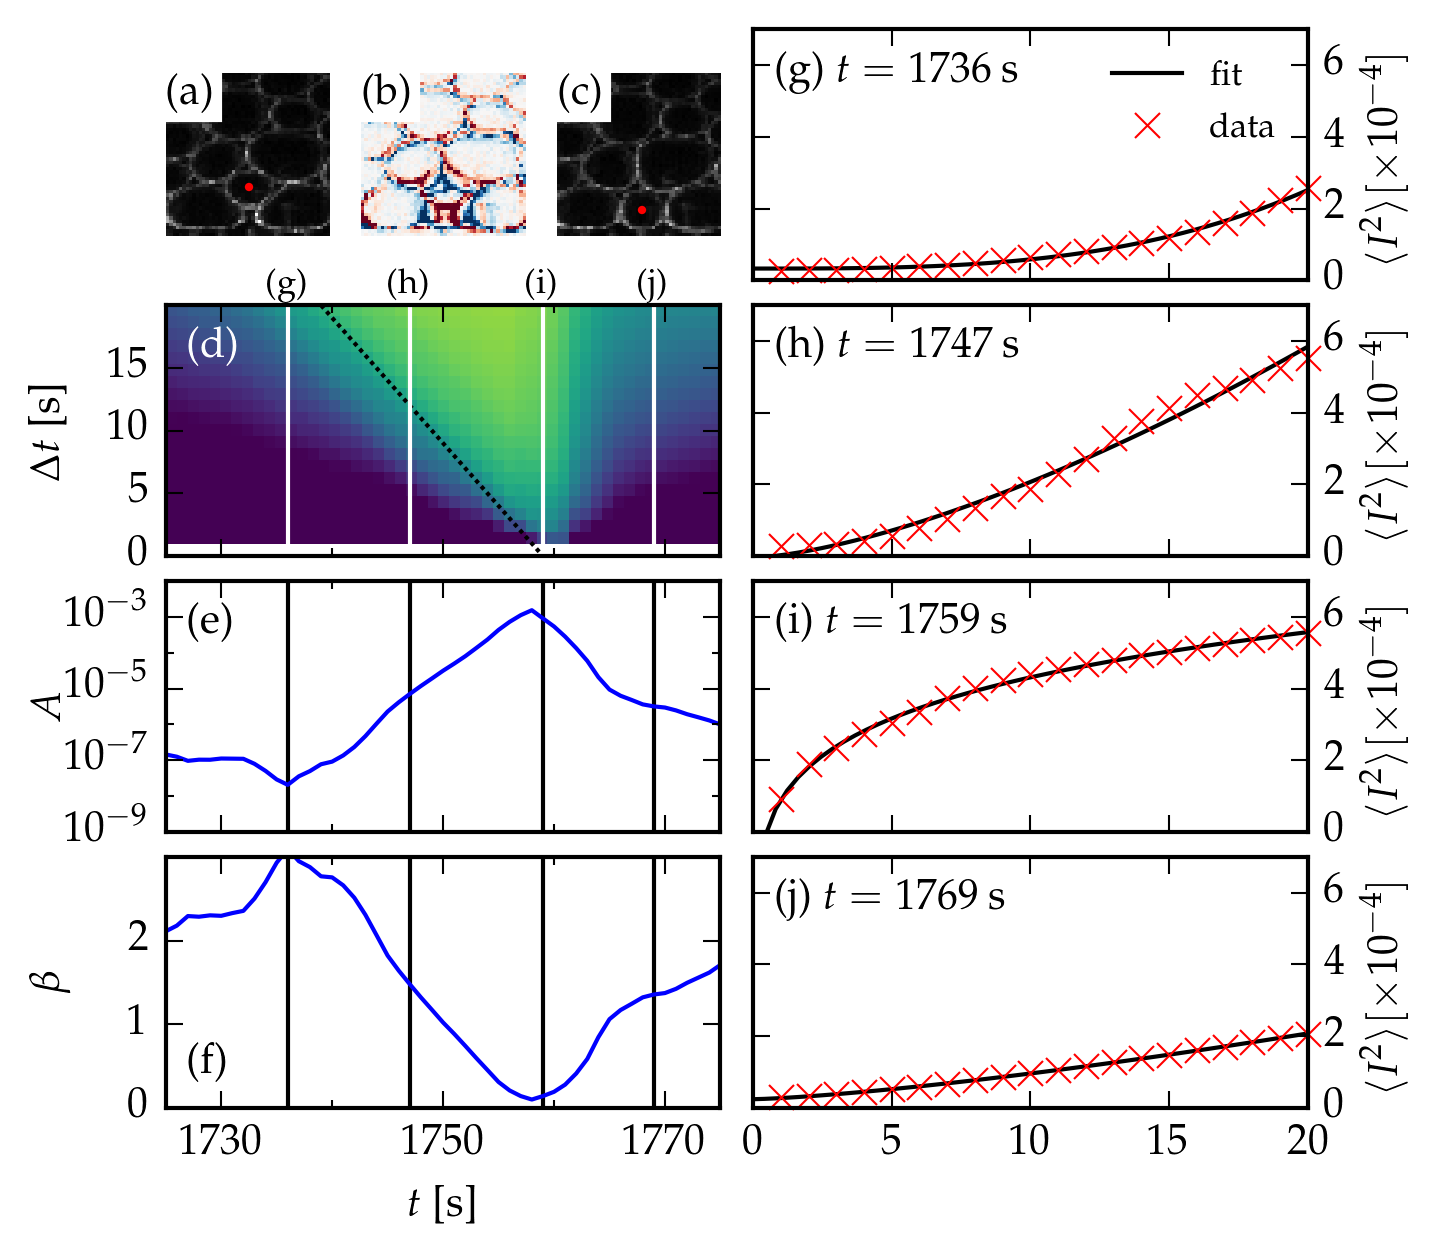

In [7]:
lts,ldts,lfitdata,lvardtdata = data_lowphi
ts,dts,fitdata, vardtdata = data_highphi

import matplotlib.gridspec as gridspec
from scipy.optimize import curve_fit

fullfig(hf=2)
gs = gridspec.GridSpec(4, 6)
gs.update(hspace=0.1)
plt.subplots_adjust(right=0.9)

splloc = 'upper left'

msk = np.arange(1725,1780)


# we start by plotting the original images
im1 = np.load(r"U:\20150907 3e-5\crop\20150907T160911~gdot3.00000E-5~A520000000000.00000\%05i.npy" % min(msk))
im2 = np.load(r"U:\20150907 3e-5\crop\20150907T160911~gdot3.00000E-5~A520000000000.00000\%05i.npy" % max(msk))

im1 = im1[0:50,50:100]
im2 = im2[0:50,50:100]

before = plt.subplot(gs[0,0])
before.imshow(im1, vmin=0, vmax=0.5, interpolation='nearest', cmap='gray', origin='lower')
before.axis('off')
before.set_ylim(-0.5,49.5)
before.set_xlim(-0.5,49.5)
plt.plot(25,14.5,"r.",ms=3)
#
before.text(0,49,"(a)",va='top',ha='left', bbox={'facecolor':'white', 'ec': 'white', 'pad': 1})

#subplotlabel(r"(a)", ax=before, zorder=1, loc=splloc, size='medium', color='white')

diff = plt.subplot(gs[0,1])
diff.imshow(im2-im1, vmin=-0.1, vmax=0.1, cmap='RdBu', interpolation='nearest', origin='lower')
diff.axis('off')
diff.text(0,49,"(b)",va='top',ha='left', bbox={'facecolor':'white', 'ec': 'white', 'pad': 1})

after = plt.subplot(gs[0,2])
after.imshow(im2, vmin=0, vmax=0.5, interpolation='nearest', cmap='gray', origin='lower')
after.axis('off')
after.text(0,49,"(c)",va='top',ha='left', bbox={'facecolor':'white', 'ec': 'white', 'pad': 1})
after.set_ylim(-0.5,49.5)
after.set_xlim(-0.5,49.5)
after.plot(25.5,7.5,"r.",ms=3)

npix = 200*200

ax1 = plt.subplot(gs[1,:3])
ax2 = plt.subplot(gs[2,:3], sharex=ax1)
ax3 = plt.subplot(gs[3,:3], sharex=ax2)

for ax in [ax1,ax2,ax3]:
    ax.yaxis.set_label_coords(-0.17, 0.5)

plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
ax3.set_xlabel("$t$ [s]")

times = [1736,1747,1759,1769]
labels = ['(g)', '(h)', '(i)', '(j)']

xticks = [1730, 1750, 1770]
ax3.set_xticks(xticks) # + times)
ax3.set_xticks([1740,1760], minor=True)
ax3.set_xticklabels([str(x) for x in xticks]) # + labels)
ax3.set_xlim(1725, 1775)

for t,label in zip(times,labels):
    ax1.axvline(t, color='white', zorder=2)
    ax1.text(t, 21, label, fontsize='small', ha='center')
    ax2.axvline(t, color='black')
    ax3.axvline(t, color='black')

norm = matplotlib.colors.LogNorm(vmin=5e-5, vmax=1e-3) 

#### D
im = ax1.imshow(vardtdata[:,msk]/npix, aspect='auto', origin='lower', extent=[min(msk), max(msk), 0, max(dts)], norm=norm, interpolation='nearest')
ax1.set_ylabel('$\Delta t$ [s]', labelpad=4)
subplotlabel(r"(d)", ax=ax1, zorder=1, loc=splloc, color='white', size='medium')
ax1.plot([1759-20,1759], [20,0], color="black", dashes=(1,1), zorder=1)

ax1.set_yticks([0,5,10,15])

#### E
Aprime = (fitdata[msk, 0]/npix) #**(1/fitdata[msk, 1])
ax2.plot(ts[msk], Aprime, label=r'$\phi = 1.5$')
ax2.set_ylabel(r"$A$", labelpad=4)

ax2.semilogy()
ax2.set_ylim(1e-9,1e-2)
ax2.set_yticks([1e-9,1e-7,1e-5,1e-3])
ax2.set_yticks([1e-8,1e-6,1e-4,1e-2], minor=True)
subplotlabel(r"(e)", ax=ax2, zorder=1, loc=splloc, size='medium')
#ax2.set_yticklabels(["0", "1", "2"])

#### F
ax3.plot(ts[msk], fitdata[msk, 1], label=r'$\phi = 1.5$')

ax3.set_ylabel(r"$\beta$", labelpad=4)
ax3.set_ylim(0,3)
ax3.set_yticks([0,1,2])
#ax3.get_xticklabels()[0].set_horizontalalignment('left')
#ax3.get_xticklabels()[-1].set_horizontalalignment('right')
subplotlabel(r"(f)", ax=ax3, zorder=1, loc='lower left', size='medium')

#cb = plt.colorbar(im, ax=[ax1,ax2,ax3], aspect=40, fraction=0.1)
#cb.set_label(r'$\langle \Delta I^2 \rangle$', labelpad=-15)
# nu de andere plotjesssss

#### GHIJ
x = np.linspace(0,20)
ax = None
for i,(t,label) in enumerate(zip(times,labels)):
    ax = plt.subplot(gs[i,3:], sharex=ax)
    
    A,beta,C = fitdata[t, :3]
    ax.plot(x, (A*(x)**beta + C)/npix, color="black", label="fit")
    
    ax.plot(dts[1:], vardtdata[1:,t]/npix, "rx", clip_on=False, label="data" )
    
    print t, fitdata[t, :3], vardtdata[:,t]/npix
    ax.set_ylim(0, 0.7e-3)
    ax.set_yticks([0,0.2e-3,0.4e-3, 0.6e-3])
    ax.set_yticklabels(["0", "2", "4", "6"])
    ax.set_ylabel(r"$\langle I^2 \rangle [\times 10^{-4}]$", labelpad=4)
    
    if i < len(labels)-1:
        plt.setp(ax.get_xticklabels(), visible=False)
    if i == 0:
        ax.legend(loc='upper right', fontsize='small', frameon=False, numpoints =1)        

    subplotlabel(label + " $t=%i$ s" % t, ax=ax, zorder=1, loc=splloc, size='medium')

    ax.yaxis.set_ticks_position("right")
    ax.yaxis.set_ticks_position("both")
    ax.yaxis.set_label_position("right")
    
savefig('rearrangement.pdf')